In [1]:
import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt

In [2]:
# load sst
sst = scp.load_sst()['sst']
sst

<xarray.DataArray 'sst' (time: 376, lat: 30, lon: 141)>
[1590480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 20.0 22.0 24.0 26.0 28.0 ... 294.0 296.0 298.0 300.0
  * lat      (lat) float64 -29.0 -27.0 -25.0 -23.0 -21.0 ... 23.0 25.0 27.0 29.0

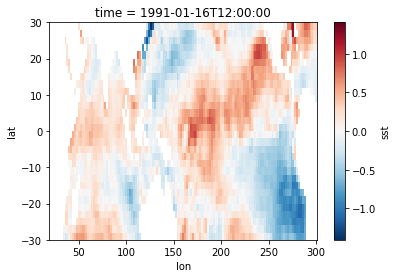

In [3]:
# get ssta
ssta = scp.get_anom(sst,method=1)
ssta[0].plot()

In [4]:
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))

In [5]:
IODW = ssta.loc[:,-10:10,50:70].mean(axis=(1,2))
IODE = ssta.loc[:,-10:0,90:110].mean(axis=(1,2))
IODI = +IODW - IODE

In [6]:
X = np.vstack([np.array(Nino34),np.array(IODI)]).T
# multiple linear regression
MLR = scp.MultLinReg(X,np.array(ssta))

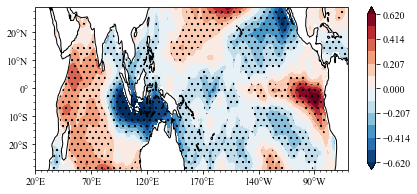

In [9]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,MLR.slope[1])
n = ax.sig_plot(lon,lat,MLR.pv_i[1],color="k",marker="..")
ax.init_map(stepx=50, ysmall=2.5)
plt.colorbar(m)
plt.savefig("../pic/MLR.png",dpi=200)